In [1]:
import numpy as np
from scipy.stats import norm, t
import matplotlib.pyplot as plt

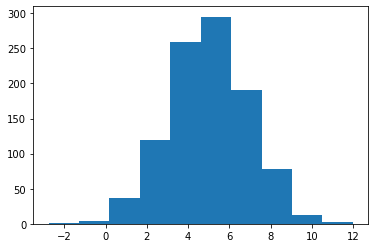

In [2]:
# Normal distributed Population: mean, std
mu = 5
std = 2

# Get an N=1000 sample
N = 1000
sample = np.random.randn(N)*std + mu

plt.hist(x=sample, bins=10)
plt.show()

# Z-confidence interval

In [3]:
mu_hat = np.mean(sample)
sigma_hat = np.std(sample, ddof=1)

gamma = 0.95
z_left = norm.ppf( (1 - gamma) / 2 )
z_right = norm.ppf( (1 + gamma) / 2 )

lower = mu_hat + z_left * sigma_hat / np.sqrt(N)
upper = mu_hat + z_right * sigma_hat / np.sqrt(N)
print(mu_hat, lower, upper)

5.006877150180531 4.8860950151845 5.127659285176563


# t-confidence interval

In [4]:
mu_hat = np.mean(sample)
sigma_hat = np.std(sample, ddof=1)

gamma = 0.95
t_left = t.ppf( (1 - gamma) / 2, df=N-1)
t_right = t.ppf( (1 + gamma) / 2, df=N-1)

lower = mu_hat + t_left * sigma_hat / np.sqrt(N)
upper = mu_hat + t_right * sigma_hat / np.sqrt(N)
print(mu_hat, lower, upper)

5.006877150180531 4.885948503972498 5.127805796388564


# Experiment
- Check the $\gamma$-CI definition: 
    + $\gamma$ of the time, the $\gamma$ confidence interval will contain the true $\mu$
    + Or If we do an experiment many times, $\gamma$ \% of those time the population $\mu$ will contained within that CI

In [5]:
def experiment(mu, sigma, gamma):
    sample = np.random.randn(N)*sigma + mu

    mu_hat = np.mean(sample)
    sigma_hat = np.std(sample, ddof=1)

    t_left = t.ppf( (1 - gamma) / 2, df=N-1)
    t_right = t.ppf( (1 + gamma) / 2, df=N-1)
    lower = mu_hat + t_left * sigma_hat / np.sqrt(N)
    upper = mu_hat + t_right * sigma_hat / np.sqrt(N)

    return mu > lower and mu < upper

In [6]:
N = 10000
results = [experiment(mu=5, sigma=2, gamma=0.90) for _ in range(N)]

np.mean(results)

0.9017

In [7]:
N = 10000
results = [experiment(mu=5, sigma=2, gamma=0.95) for _ in range(N)]

np.mean(results)

0.949

In [8]:
N = 10000
results = [experiment(mu=5, sigma=2, gamma=0.99) for _ in range(N)]

np.mean(results)

0.9891